# Notebook for Displaying Region Shapefile

In [1]:
"""
This script takes daily 'observational' near-surface air temperature data from AWS's and filters to a subsetted region,
 the boundaries of which are defined using output from the MetUM RCM
"""

import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from src.helper_functions import grid_coords_to_2d_latlon_coords

In [2]:
base_path = '/home/jez/Bias_Correction/'
climate_data_path = f'{base_path}data/MetUM011_LandSeaMask.nc'
shapefile_path = f'{base_path}data/Ross_Region_Shapefile/ross_region.shp'

In [3]:
ds_climate = xr.open_dataset(climate_data_path)
ds_climate = grid_coords_to_2d_latlon_coords(ds_climate,climate_data_path)
gdf = gpd.read_file(shapefile_path)

ERROR:fiona._env:PROJ: proj_identify: /home/jez/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


ERROR:fiona._env:PROJ: proj_identify: /home/jez/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<GeoAxesSubplot: xlabel='longitude', ylabel='latitude'>

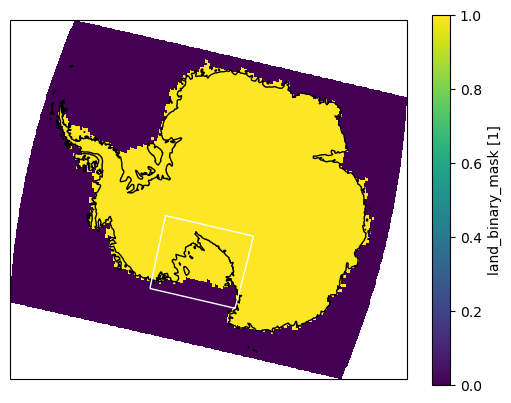

In [4]:
map_proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90, globe=None)

plot = ds_climate.lsm.plot(x='longitude',
                y='latitude',
                transform=ccrs.PlateCarree(),
                subplot_kws={"projection": map_proj})

plot.axes.coastlines()

gdf.to_crs(map_proj).boundary.plot(ax=plt.gca(), color="w", linewidth=1.0)

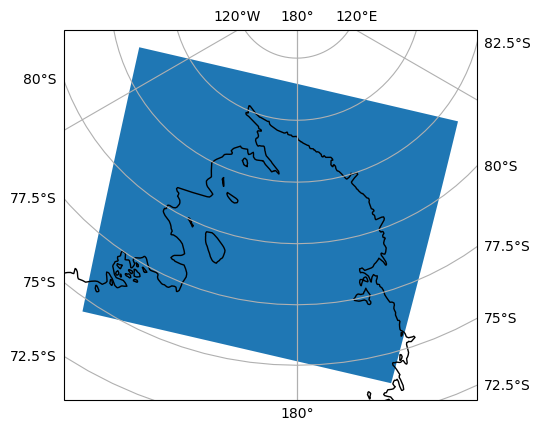

In [5]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": map_proj})#, figsize=(dc, dc))
plot = gdf.to_crs(map_proj).plot(ax=ax)
ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
ax.coastlines()